In [2]:
import pandas as pd
import numpy as np

mu_vec = pd.read_csv('data/mu_vec.csv', index_col=0).values
covariances_mtx = pd.read_csv('data/covariance_mtx.csv', index_col=0).values

mu_vec = mu_vec.flatten()

# this matrix comes from the lecture on March 29th
M = (np.linalg.inv(covariances_mtx) @ mu_vec)*(1/(mu_vec.T @ np.linalg.inv(covariances_mtx) @ mu_vec))

M

array([  6.7012059 , -30.09757609,   5.4559178 ,  21.00700761,
         2.5337797 ])

In [3]:
def expected_return(x_vec, mu_vec):
    return np.dot(x_vec, mu_vec)

def variance(x_vec, covariances_mtx):
    return np.dot(x_vec, np.dot(covariances_mtx, x_vec))

In [4]:
# NOTE: mu0 is the expected weekly return of the portfolio
mu0 = 1

x_star = M*mu0

x_star, expected_return(x_star, mu_vec), variance(x_star, covariances_mtx)

(array([  6.7012059 , -30.09757609,   5.4559178 ,  21.00700761,
          2.5337797 ]),
 1.0,
 1.2265101382521313)

Text(0, 0.5, 'Minimum weekly variance ($\\sigma^2$)')

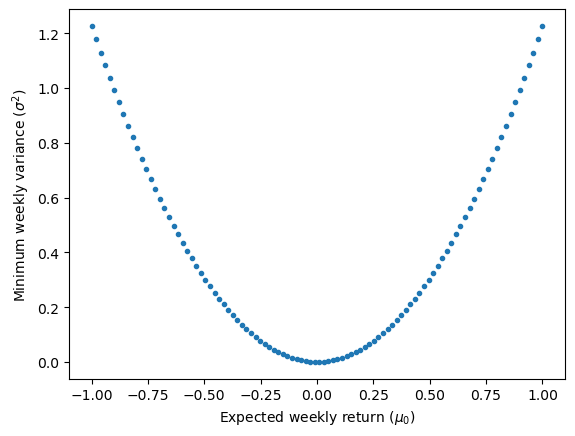

In [8]:
import matplotlib.pyplot as plt

mu0 = np.linspace(-1, 1, 100)
variances = [variance(M*mu0_, covariances_mtx) for mu0_ in mu0]

plt.plot(mu0, variances, '.')
plt.xlabel('Expected weekly return ($\mu_0$)')
plt.ylabel('Minimum weekly variance ($\sigma^2$)')